In [1]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import DataPreProcessor as DPP

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows


# 1. Load data


In [2]:
chotot_df = pd.read_csv("chotot_cleaned.csv")


In [3]:
alonhadat_df = pd.read_csv("alonhadat.csv")


In [4]:
chotot_df.drop(columns=['address', 'type_real_estate'], inplace=True)
chotot_df.rename(columns={'ahl_type': 'type_real_estate'}, inplace=True)
chotot_df['website'] = 'Chotot'
chotot_df['front_road'] = np.nan
chotot_df.head(3)


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,apartment_feature,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
0,05/11/2021,Phường Tam Hòa,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,NaN,NaN,Đang chờ sổ,70.0,NaN,NaN,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,1150.0,Chung cư,Chotot,NaN
1,05/11/2021,Phường Thống Nhất,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,Bắc,Nam,Đã có sổ,48.0,NaN,Nội thất đầy đủ,NaN,1,1,Nhiều hơn 10,NaN,NaN,NaN,1550.0,Chung cư,Chotot,NaN
2,05/11/2021,Phường Hố Nai,Thành phố Biên Hòa,Đồng Nai,Chưa bàn giao,NaN,NaN,Giấy tờ khác,67.0,NaN,Hoàn thiện cơ bản,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,360.0,Chung cư,Chotot,NaN


In [5]:
alonhadat_df['website'] = 'alonhadat'
alonhadat_df.head(3)


,city,date,direction,district,floors,front_road,length,price (million),property_legal_document,rooms,size,type_real_estate,ward,width,website
0,Bình Dương,08/11/2021,NaN,Thành phố Thủ Dầu Một,2.0,12.0,12.0,3200.0,NaN,3.0,120.0,Nhà mặt tiền,Phường Hiệp An,6.0,alonhadat
1,Bình Dương,08/11/2021,NaN,Thành phố Thuận An,NaN,10.0,70.0,32000.0,Sổ hồng/ Sổ đỏ,NaN,900.0,Nhà mặt tiền,Phường An Phú,17.0,alonhadat
2,Bình Dương,08/11/2021,NaN,Thành phố Dĩ An,1.0,4.0,12.0,2550.0,Sổ hồng/ Sổ đỏ,3.0,60.0,Nhà trong hẻm,Phường Đông Hòa,5.0,alonhadat


In [8]:
agreement_df =alonhadat_df[alonhadat_df['price (million)'] == "Thỏa thuận"].copy()

In [9]:
agreement_df.head()

,city,date,direction,district,floors,front_road,length,price (million),property_legal_document,rooms,size,type_real_estate,ward,width,website
1401,Bình Dương,28/10/2021,NaN,Huyện Bắc Tân Uyên,NaN,10.0,150.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,15800.0,"Kho, xưởng",Xã Đất Cuốc,100.0,alonhadat
2777,Bình Dương,05/11/2021,Đông Nam,Thành phố Thuận An,NaN,16.0,30.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,450.0,"Đất nền, liền kề, đất dự án",Phường Thuận Giao,15.0,alonhadat
2964,Bình Dương,06/11/2021,NaN,Thị xã Tân Uyên,NaN,NaN,NaN,Thỏa thuận,NaN,NaN,140000.0,"Kho, xưởng",Phường Khánh Bình,NaN,alonhadat
3758,Bình Dương,07/11/2021,NaN,Thị xã Tân Uyên,NaN,8.0,100.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,22000.0,"Kho, xưởng",Xã Vĩnh Tân,100.0,alonhadat
3779,Bình Dương,07/11/2021,Tây,Huyện Bắc Tân Uyên,NaN,18.0,130.0,Thỏa thuận,NaN,NaN,15800.0,"Kho, xưởng",Xã Đất Cuốc,120.0,alonhadat


In [58]:
alonhadat_df['price (million)'] = alonhadat_df['price (million)'].apply(
    lambda x: np.nan if x == 'Thỏa thuận' else float(x))


# 2. Merge Data


In [59]:
alonhadat_df.columns


Index(['city', 'date', 'direction', 'district', 'floors', 'front_road',
       'length', 'price (million)', 'property_legal_document', 'rooms', 'size',
       'type_real_estate', 'ward', 'width', 'website'],
      dtype='object')

In [60]:
chotot_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'apartment_feature', 'rooms',
       'toilets', 'floors', 'living_size (m2)', 'width (m)', 'length (m)',
       'price (million)', 'type_real_estate', 'website', 'front_road'],
      dtype='object')

In [61]:
alonhadat_df.columns.difference(chotot_df.columns)


Index(['city', 'date', 'district', 'length', 'size', 'width'], dtype='object')

In [62]:
alonhadat_df.rename(columns={"city": "region", "date": "list_time", "size": "size (m2)",
                    'district': "area", 'length': "length (m)", 'width': "width (m)"}, inplace=True)


In [63]:
# merge 2 data lai thanh BDS_df
BDS_df = pd.concat([chotot_df, alonhadat_df], ignore_index=True)


In [64]:
BDS_df.head(5)


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,apartment_feature,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
0,05/11/2021,Phường Tam Hòa,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,NaN,NaN,Đang chờ sổ,70.0,NaN,NaN,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,1150.0,Chung cư,Chotot,NaN
1,05/11/2021,Phường Thống Nhất,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,Bắc,Nam,Đã có sổ,48.0,NaN,Nội thất đầy đủ,NaN,1,1,Nhiều hơn 10,NaN,NaN,NaN,1550.0,Chung cư,Chotot,NaN
2,05/11/2021,Phường Hố Nai,Thành phố Biên Hòa,Đồng Nai,Chưa bàn giao,NaN,NaN,Giấy tờ khác,67.0,NaN,Hoàn thiện cơ bản,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,360.0,Chung cư,Chotot,NaN
3,05/11/2021,Phường Hố Nai,Thành phố Biên Hòa,Đồng Nai,Chưa bàn giao,NaN,NaN,Đã có sổ,70.0,NaN,NaN,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,1700.0,Chung cư,Chotot,NaN
4,05/11/2021,Phường Thống Nhất,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,NaN,NaN,Đã có sổ,48.0,NaN,NaN,NaN,2,1,Nhiều hơn 10,NaN,NaN,NaN,10.0,Chung cư,Chotot,NaN


# 3. EDA


## 3.0 Repreprocessing


### Website

In [83]:
BDS_df['website'].unique()

array(['Chotot', 'alonhadat'], dtype=object)

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

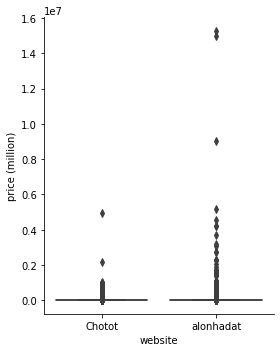

In [91]:
plt.figure(figsize=(15,5))


### Region

In [65]:
BDS_df['region'].unique()


array(['Đồng Nai', 'Bình Dương', 'Tp Hồ Chí Minh', 'Hồ Chí Minh'],
      dtype=object)

In [66]:
BDS_df['region'].replace({'Tp Hồ Chí Minh': 'Hồ Chí Minh'}, inplace=True)


In [76]:
BDS_df['price (million)'].describe()

count    2.208630e+05
mean     7.903109e+06
std      3.707341e+09
min      3.700000e-01
25%      2.750000e+03
50%      5.300000e+03
75%      1.100000e+04
max      1.742304e+12
Name: price (million), dtype: float64

In [82]:
BDS_df[BDS_df['price (million)'] == max(BDS_df['price (million)'])]

,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,apartment_feature,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
47178,01/11/2021,Phường 15,Quận Tân Bình,Hồ Chí Minh,NaN,NaN,NaN,Đã có sổ,56.0,NaN,NaN,NaN,2,1,Nhiều hơn 10,56.0,4.0,14.0,1.742304e+12,Nhà ngõ,Chotot,NaN


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (million)'>

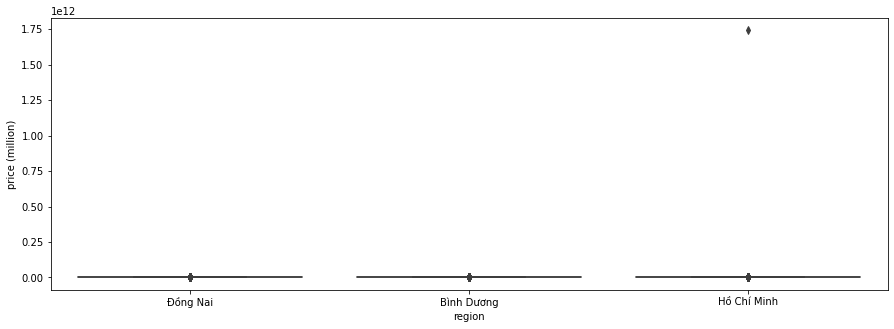

In [75]:
plt.figure(figsize=(15,5))
# sns.countplot(x='region',data=BDS_df)
sns.boxplot(x='region',y='price (million)',data=BDS_df)

=> Vì chỉ có 1 outlier làm giảm khả năng quan sát giá đất trên Đồng Nai, Bình Dương, Hồ Chí Minh nên cần làm xếp riêng trường hợp này để dễ quan sát

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (million)'>

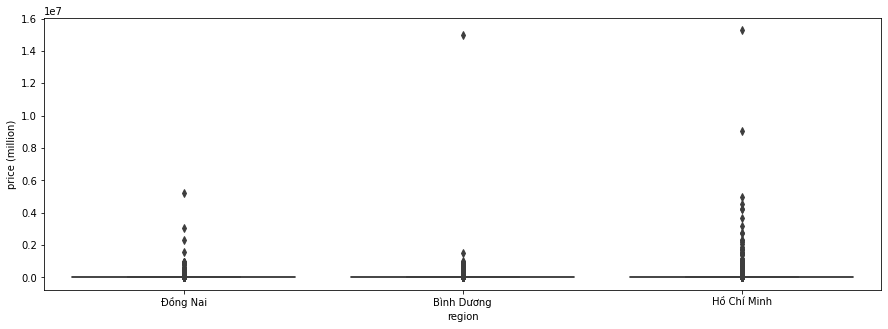

In [81]:
plt.figure(figsize=(15,5))
sns.boxplot(x='region',y='price (million)',data=BDS_df[BDS_df['price (million)']<= 1.6e7])# mức 16.000 tỷ

### Property legal document

In [35]:
property_doc = ['property_legal_document', 'website']
BDS_df[property_doc].groupby(property_doc[0]).count().sort_values(by=['website'])

,website
property_legal_document,
Giấy phép KD,22
Giấy phép XD,154
Giấy tờ hợp lệ,4122
Giấy tờ khác,4642
Đang chờ sổ,5943
Đã có sổ,71462
Sổ hồng/ Sổ đỏ,89009


In [14]:
BDS_df['property_legal_document'].replace({"Sổ hồng/ Sổ đỏ": 'Đã có sổ'},inplace=True)

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='property_legal_document', ylabel='count'>

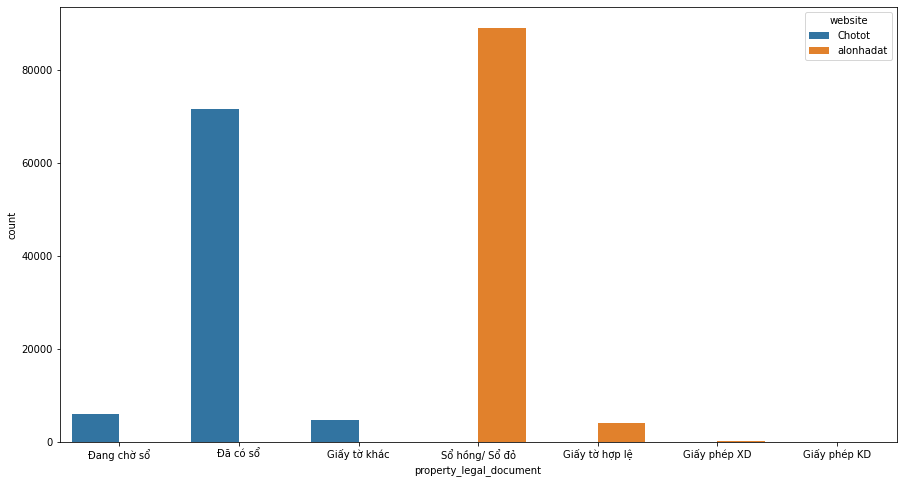

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(x='property_legal_document',
              hue='website', data=BDS_df)


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

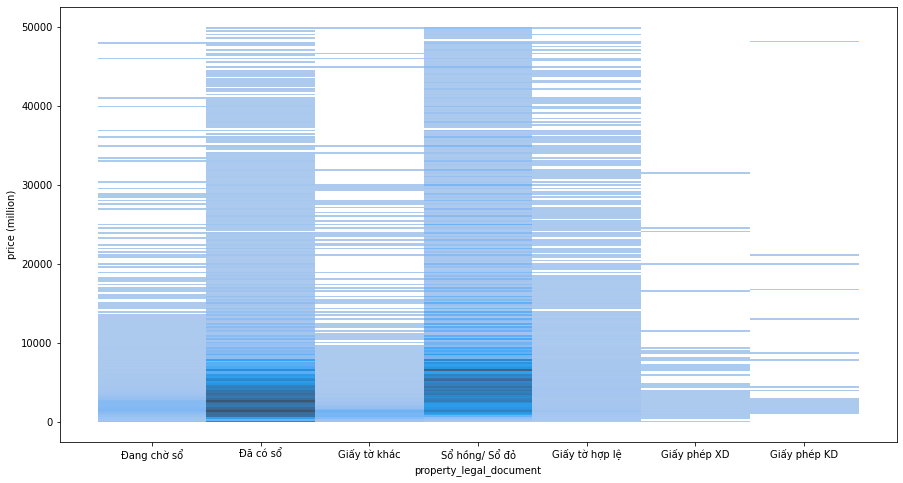

In [94]:
plt.figure(figsize=(15,8))
sns.histplot(x='property_legal_document',y='price (million)', data=BDS_df[BDS_df['price (million)']<=50000])

In [38]:
BDS_df.columns

Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'apartment_feature', 'rooms',
       'toilets', 'floors', 'living_size (m2)', 'width (m)', 'length (m)',
       'price (million)', 'type_real_estate', 'website', 'front_road'],
      dtype='object')

In [92]:
BDS_df['property_legal_document'].unique()

array(['Đang chờ sổ', 'Đã có sổ', 'Giấy tờ khác', nan, 'Sổ hồng/ Sổ đỏ',
       'Giấy tờ hợp lệ', 'Giấy phép XD', 'Giấy phép KD'], dtype=object)

In [90]:
BDS_df['floors'].unique()


array(['Nhiều hơn 10', 1, 3, 2, 4, 5, 6, 7, 10, 9, 8, nan, 18, 23, 26, 35,
       30, 15, 12, 40, 38, 29, 19, 31, 22, 25, 33, 17, 20, 13, 24, 11, 14,
       27, 16, 28, 21, 36, 32, 34, 37, 151, 50, 61, 39, 48, 42, 44, 222,
       75, 2000, 68, 988, 333, 163, 45, 144, 43, 91, 46, 55, 52],
      dtype=object)

In [71]:
BDS_df['floors'] = BDS_df['floors'].apply(
    DPP.convertNum2Int, convert_dtype=False)


In [74]:
BDS_df['floornumber'].unique()


array([ nan,  16.,   7.,   4.,  12.,   1.,  14.,  18.,  11.,  10.,   9.,
         3.,  29.,   2.,  15.,  22.,  21.,   8.,  19.,   6.,  20.,  35.,
        23.,  27.,  28.,   5.,  25.,  24.,  34.,  13.,  30.,  17.,  26.,
        40.,  37.,  36.,  32.,  33.,  38.,  47.,  39.,  31.,  41.,  45.,
       456.,  48., 320., 132.,  44.])

In [82]:
BDS_df['floornumber'] = BDS_df['floornumber'].apply(
    DPP.convertNum2Int, convert_dtype=False)


In [76]:
BDS_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220903 entries, 0 to 220902
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   list_time                220903 non-null  object 
 1   ward                     220805 non-null  object 
 2   area                     220901 non-null  object 
 3   region                   220903 non-null  object 
 4   property_status          13038 non-null   object 
 5   direction                55567 non-null   object 
 6   balconydirection         4305 non-null    object 
 7   property_legal_document  175354 non-null  object 
 8   size (m2)                220743 non-null  float64
 9   floornumber              3876 non-null    object 
 10  furnishing_sell          26166 non-null   object 
 11  apartment_feature        2881 non-null    object 
 12  rooms                    170759 non-null  object 
 13  toilets                  65152 non-null   object 
 14  floo

In [68]:
BDS_df.describe(include='all')


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,apartment_feature,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
count,220903,220805,220901,220903,13038,55567,4305,175354,2.207430e+05,3876.000000,26166,2881,170759,65152,171266,42737.000000,176026.000000,172069.000000,2.208630e+05,220898,220903,123161.000000
unique,374,690,48,3,2,8,8,7,NaN,NaN,4,1,144,7,71,NaN,NaN,NaN,NaN,29,2,NaN
top,07/11/2021,Phường 12,Quận Gò Vấp,Hồ Chí Minh,Đã bàn giao,Đông Nam,Đông Nam,Sổ hồng/ Sổ đỏ,NaN,NaN,Nội thất đầy đủ,Căn góc,2,2,Nhiều hơn 10,NaN,NaN,NaN,NaN,Nhà trong hẻm,alonhadat,NaN
freq,27914,7559,20650,185480,9125,10767,1154,89009,NaN,NaN,9634,2881,27630,26926,51502,NaN,NaN,NaN,NaN,56155,125494,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.499812e+04,12.199690,NaN,NaN,NaN,NaN,NaN,166.610159,13.660408,29.863471,7.903109e+06,NaN,NaN,10.998878
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.917641e+06,12.160109,NaN,NaN,NaN,NaN,NaN,1126.917752,781.931429,586.439799,3.707341e+09,NaN,NaN,17.637787
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,3.700000e-01,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000e+01,6.000000,NaN,NaN,NaN,NaN,NaN,64.000000,4.000000,12.000000,2.750000e+03,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+01,10.000000,NaN,NaN,NaN,NaN,NaN,100.000000,5.000000,17.000000,5.300000e+03,NaN,NaN,8.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310000e+02,17.000000,NaN,NaN,NaN,NaN,NaN,180.000000,6.500000,22.000000,1.100000e+04,NaN,NaN,13.000000


In [78]:
BDS_df.replace({'Thị xã Dĩ An': 'Thành phố Dĩ An',
                'Thành phố Biên Hoà': 'Thành phố Biên Hòa',
                'Quận Thủ Đức': 'Thành phố Thủ Đức'}, inplace=True)


In [79]:
region_cols = ['area', 'region']
BDS_df[region_cols].groupby(
    region_cols).sum().sort_values(axis=0, by=['region'])


,
area,region
Huyện Bàu Bàng,Bình Dương
Thành phố Thủ Dầu Một,Bình Dương
Thành phố Thuận An,Bình Dương
Thành phố Dĩ An,Bình Dương
Thị xã Bến Cát,Bình Dương
Huyện Phú Giáo,Bình Dương
Thị xã Tân Uyên,Bình Dương
Huyện Dầu Tiếng,Bình Dương
Huyện Bắc Tân Uyên,Bình Dương


In [83]:
BDS_df['floornumber'].unique()

array([nan, 16, 7, 4, 12, 1, 14, 18, 11, 10, 9, 3, 29, 2, 15, 22, 21, 8,
       19, 6, 20, 35, 23, 27, 28, 5, 25, 24, 34, 13, 30, 17, 26, 40, 37,
       36, 32, 33, 38, 47, 39, 31, 41, 45, 456, 48, 320, 132, 44],
      dtype=object)

In [89]:
BDS_df.loc[BDS_df['floornumber']<= 48,'floornumber'].unique()

array([16, 7, 4, 12, 1, 14, 18, 11, 10, 9, 3, 29, 2, 15, 22, 21, 8, 19, 6,
       20, 35, 23, 27, 28, 5, 25, 24, 34, 13, 30, 17, 26, 40, 37, 36, 32,
       33, 38, 47, 39, 31, 41, 45, 48, 44], dtype=object)

In [25]:
BDS_df.to_csv('BDS.csv')


## 3.1 Overview


In [26]:
BDS_df.loc[BDS_df['price (million)'] == max(BDS_df['price (million)']), :]


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,apartment_feature,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
47178,01/11/2021,Phường 15,Quận Tân Bình,Hồ Chí Minh,NaN,NaN,NaN,Đã có sổ,56.0,NaN,NaN,NaN,2,1,Nhiều hơn 10,56.0,4.0,14.0,1.742304e+12,Nhà ngõ,Chotot,NaN


In [27]:
len(BDS_df[BDS_df['price (million)'] < 50000]) / len(BDS_df)  # nho hon 50 ty


0.9512319887009231

count    2.208630e+05
mean     7.903109e+06
std      3.707341e+09
min      3.700000e-01
25%      2.750000e+03
50%      5.300000e+03
75%      1.100000e+04
max      1.742304e+12
Name: price (million), dtype: float64


<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='Count'>

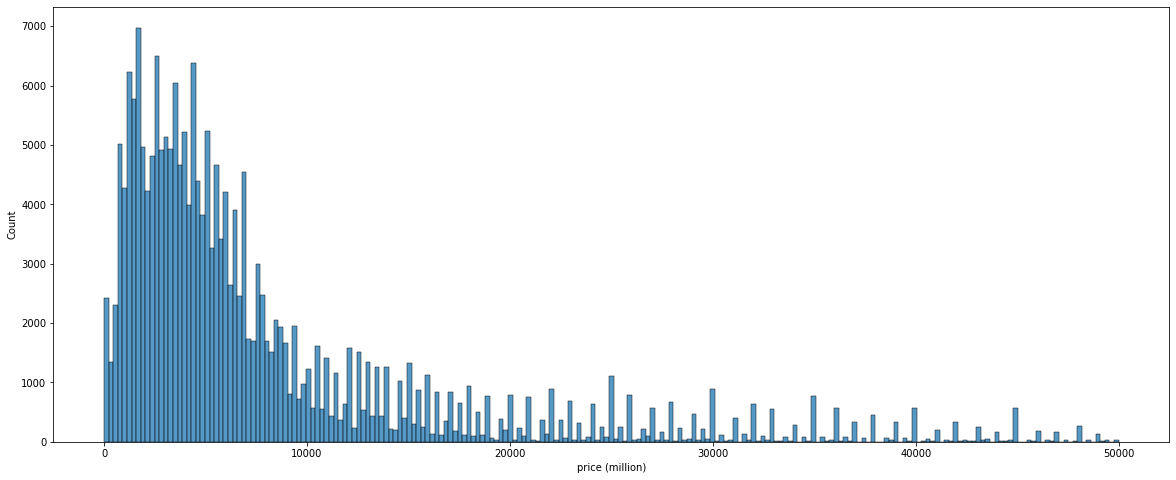

In [28]:
print(BDS_df['price (million)'].describe())
plt.figure(figsize=(20, 8))
sns.histplot(BDS_df[BDS_df['price (million)'] < 50000]
             ['price (million)'], bins="auto")


## 3.2 Numeric variables


<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='size (m2)', ylabel='Count'>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='floornumber', ylabel='Count'>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='living_size (m2)', ylabel='Count'>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='width (m)', ylabel='Count'>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='length (m)', ylabel='Count'>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='Count'>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='front_road', ylabel='Count'>

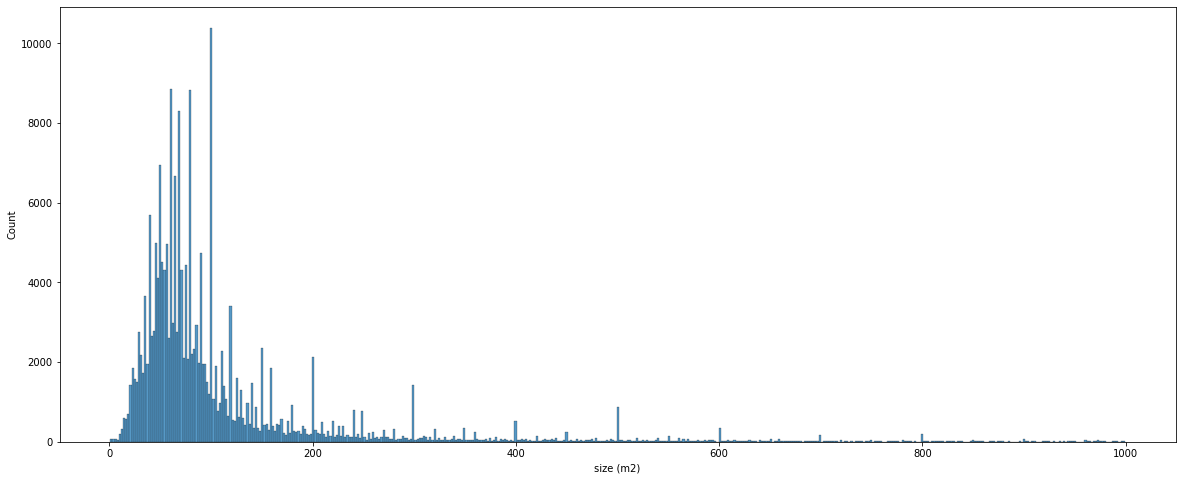

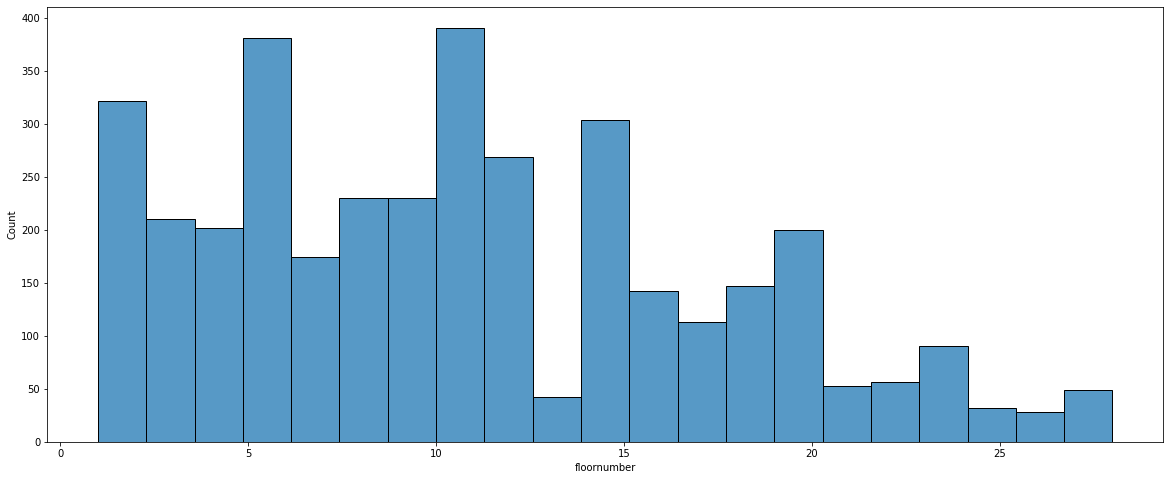

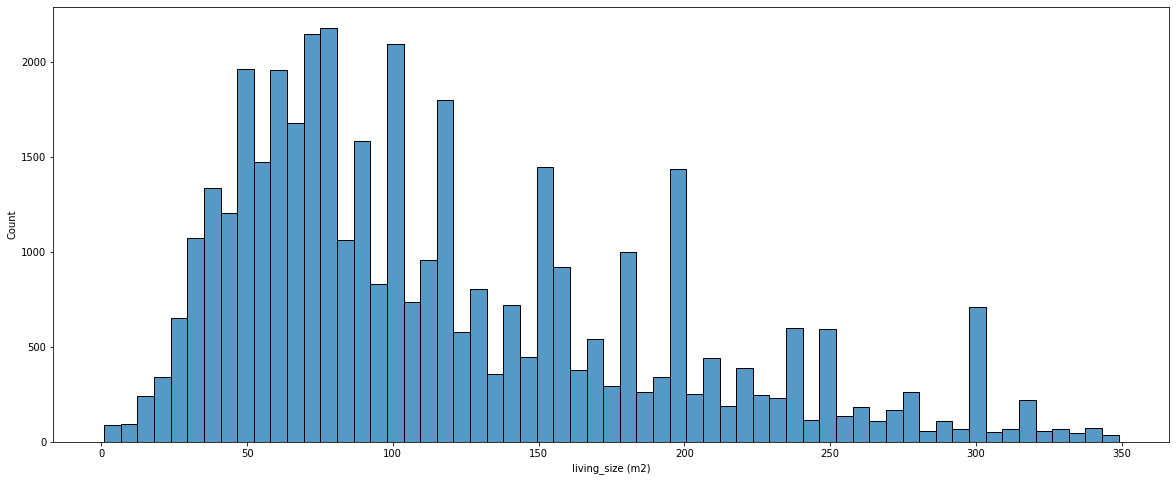

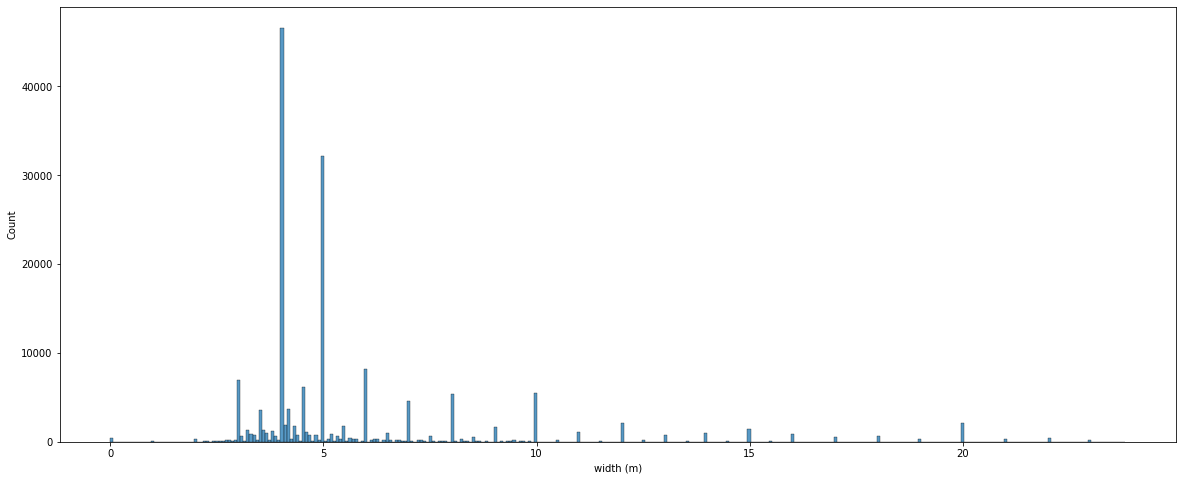

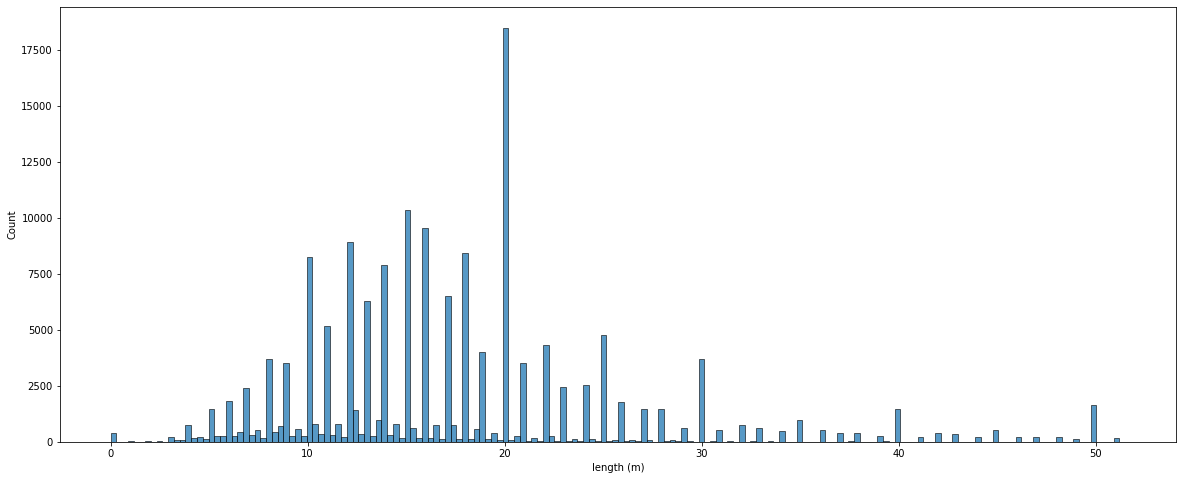

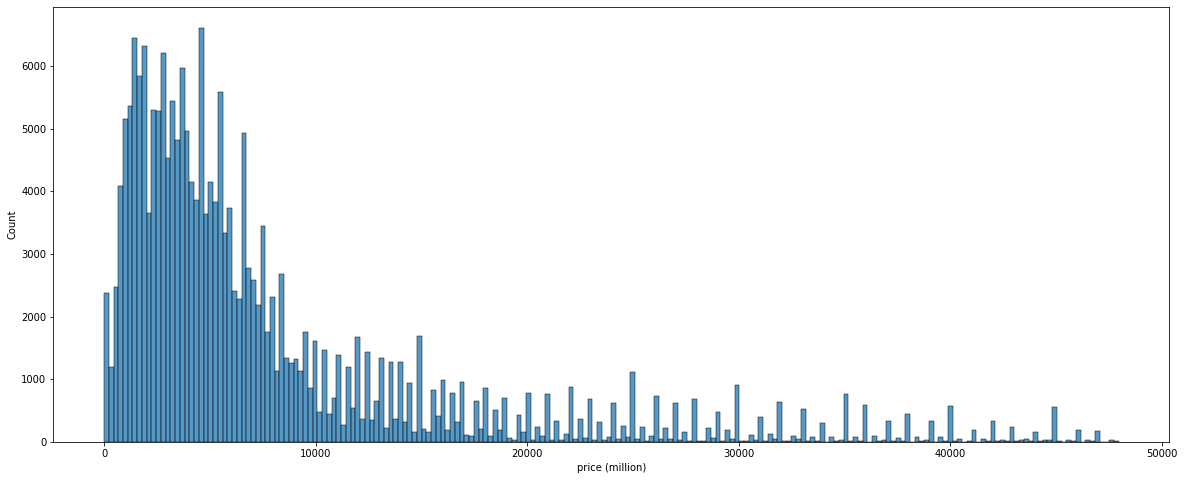

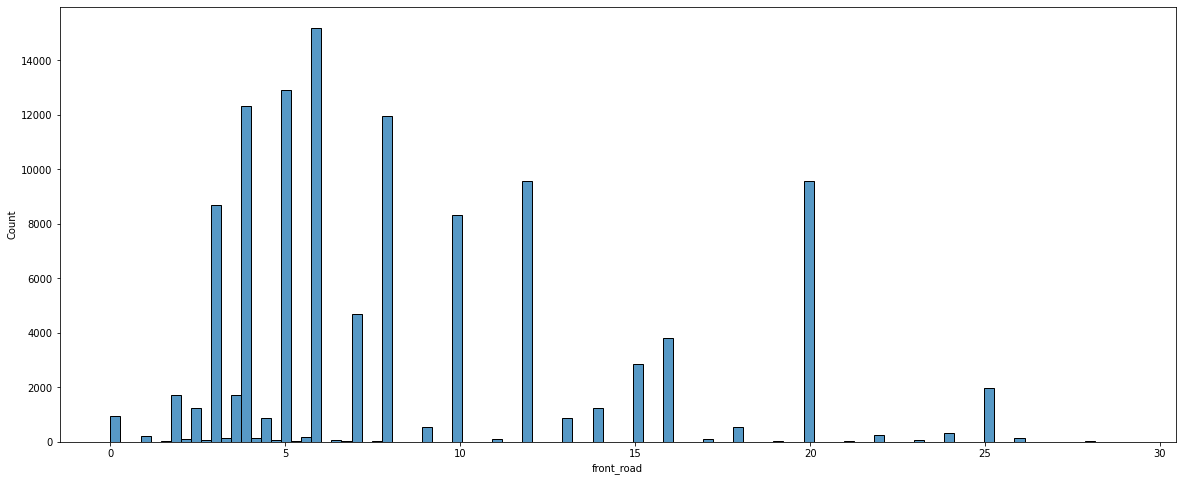

In [29]:
for col in BDS_df.columns:
    if BDS_df[col].dtypes == 'float':
        quant = BDS_df[col].quantile(0.95)
        plt.figure(figsize=(20, 8))
        sns.histplot(BDS_df[BDS_df[col] < quant][col], bins="auto")


## 3.3 Categorical variables


In [ ]:
for col in BDS_df.columns:
    if BDS_df[col].dtypes == 'object' and col not in ['list_time', 'ward']:
        if col in ['area', 'type_real_estate', 'rooms', 'floors', 'floornumber']:
            plt.figure(figsize=(25, 8))
        else:
            plt.figure(figsize=(10, 6))
        ax = sns.boxplot(x=col, y='price (million)',
                         data=BDS_df[BDS_df['price (million)'] < 50000])
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
        plt.xticks(rotation=45)
